Figure for Simon's paper in JGR.     
Altimetry data from [CMEMS](ftp://my.cmems-du.eu/Core/SEALEVEL_MED_PHY_L4_REP_OBSERVATIONS_008_051/dataset-duacs-rep-medsea-merged-allsat-phy-l4/2014/), averaged over the duration of the experiment.

In [15]:
import os
import glob
import json
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
import alborexdata
import alborexpaths

importing configuration from alborexpaths


<module 'alborexpaths' from '/home/ctroupin/Publis/AlborEx-Data-Python/python/alborexpaths.py'>

## Domain and locations

In [24]:
coordinates = alborexpaths.coordinates1
coordinates2 = alborexpaths.coordinates2
dlon, dlat = 2., 1.
coordinates[1] = 1.
coordinates[3] = 38.

### Labels
List of locations to add to the plot.

In [25]:
labelDic = OrderedDict([("Cartagena", (37.6, -0.983333)),
                       ("Almería", (36.840278, -2.468056)),
                       ("Oran", (35.696944, -0.633056)),
                       ("Cape Three Forks", (35.438333, -2.974444)),
                       ("Strait of Gibraltar", (35.966667, -5.483333)),
                       ("Alboran Sea", (36.45, -3.5)),
                       ("SPAIN", (37.7, -2.5)),
                       ("AFRICA", (35., -5.6))
                       ])

In [26]:
def add_places(m, labelDic, alpha=1):
    """
    Add labels of different places
    """
    dx = 0.05
    dy = 0.05
    for ip, places in enumerate(labelDic):
        
        lonT, latT = m(labelDic[places][1], labelDic[places][0])

        if ip <2:
            lonT2, latT2 = m(labelDic[places][1] + dx, labelDic[places][0] + dy)
            plt.text(lonT2, latT2, places, fontsize=14, zorder=3,
                     ha="center", va="bottom",
                     bbox=dict(facecolor='white', edgecolor="w", alpha=alpha))
            plt.plot(lonT, latT, "ko", zorder=4)
        elif ip < 4:
            lonT2, latT2 = m(labelDic[places][1] + dx, labelDic[places][0] - dy)
            plt.text(lonT2, latT2, places, fontsize=14, zorder=3,
                     ha="center", va="top",
                     bbox=dict(facecolor='white', edgecolor="w", alpha=alpha))
            plt.plot(lonT, latT, "ko", zorder=4)
        elif ip <= 5: 
            plt.text(lonT, latT, places, fontsize=16, ha="center", va="center",
                     bbox=dict(facecolor='white', edgecolor="w", alpha=alpha))
        else:
            plt.text(lonT, latT, places, fontsize=18, ha="center", va="center")

In [27]:
def decorate_map(m, coordinates, dlon, dlat):
    
    # Coastline and continent
    for i in range(0, len(loncoast)):
        m.plot(np.array(loncoast[i]), np.array(latcoast[i]), 
               color='k', linewidth=.25, latlon=True)
    m.fillcontinents(ax=ax, color='0.9', zorder=2)
    m.drawcountries(linewidth=.2, color="k")

    # Grid
    alborexdata.add_map_grid(m, coordinates, dlon=dlon, dlat=dlat,
                             fontname='Times New Roman', fontsize=14, 
                             linewidth=0.2, zorder=1, color=".6")
    # Scale
    m.drawmapscale(-0.45, 35.1, -0.25, 35.1, 100, barstyle='simple', 
               units='km', fontsize=12, zorder=3)

In [28]:
def add_fronts(m):
    """
    Add fronts: Cartagena, Almeria-Oran and AlboRex
    """
    p1 = (labelDic["Cartagena"][1], labelDic["Cartagena"][0])
    p2 = (.379, 36.23)
    lon1, lat1 = m(p1[0], p1[1])
    lon2, lat2 = m(p2[0], p2[1])
    plt.plot((lon1, lon2), (lat1, lat2), 'r--', label="Cartagena front")

    p1 = (labelDic["Almería"][1], labelDic["Almería"][0])
    p2 = (labelDic["Oran"][1], labelDic["Oran"][0])
    lon1, lat1 = m(p1[0], p1[1])
    lon2, lat2 = m(p2[0], p2[1])
    plt.plot((lon1, lon2), (lat1, lat2), 'b--', label="Almeria-Oran front")

    m.plot(f.lon, f.lat, "k--", linewidth=2, latlon=True, label="AlborEx front (from SST image)")
    plt.legend(fontsize=14)

# Load data
## Coast

In [29]:
loncoast, latcoast = alborexdata.read_lonlat_coast(alborexpaths.coastfile)

## Front

In [30]:
f = alborexdata.Front()
f.get_from_file(alborexpaths.frontfile)
f.smooth()

### Gyres

In [31]:
WAG = alborexdata.Gyre(-4.25, 35.75, 55., "WAG")
EAG = alborexdata.Gyre(-2.1, 35.8, 49., "EAG")
AlborexEddy = alborexdata.Gyre(-0.9, 36.5, 52.5, "AlborEx\neddy")

### Atlantic jet 

In [32]:
AJ = alborexdata.Jet()
AJ.read_from_file(alborexpaths.jetfiles[0])
AJ.smooth()
AJ2 = alborexdata.Jet()
AJ2.read_from_file(alborexpaths.jetfiles[1])
AJ2.smooth()

### Altimetry SLA

In [48]:
altimetry = alborexdata.Altimetry()
altimetry.read_from_aviso(alborexpaths.altimetryfile)

# Create the figure

In [40]:
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            lat_ts=0.5 * (coordinates[2] + coordinates[3]), resolution='h')

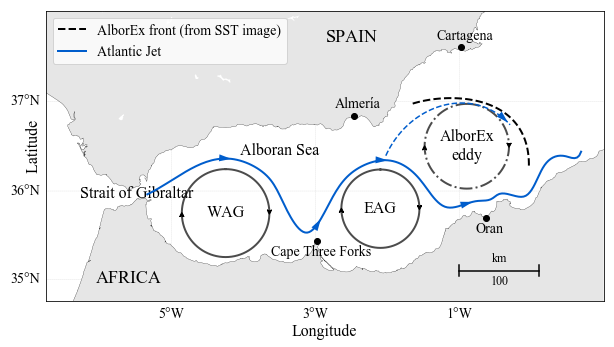

In [41]:
figname = 'front_schema08'
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax

m.plot(0, 0)
add_places(m, labelDic, alpha=0)
decorate_map(m, coordinates, dlon, dlat)

myarrowdict = dict(arrowstyle="fancy", fc="k")
WAG.add_to_map(m=m, arrowprops=myarrowdict, lw=2., color='k', alpha=0.7)
EAG.add_to_map(m=m, arrowprops=myarrowdict, lw=2., color='k', alpha=0.7)
AlborexEddy.add_to_map(m=m, arrowprops=myarrowdict, lw=2., 
                       color='k', alpha=0.7, linestyle='-.')

# add_fronts(m)
m.plot(f.lon, f.lat, "k--", linewidth=2, latlon=True, label="AlborEx front (from SST image)")

# Atlantic jet
m.plot(AJ.lon, AJ.lat, 'k-', color="#005DCC", lw=2, zorder=5, latlon=True,
       label="Atlantic Jet")
AJ.add_arrow(m, ax, 32)
AJ.add_arrow(m, ax, 75)
AJ.add_arrow(m, ax, 105)
AJ.add_arrow(m, ax, 140)

m.plot(AJ2.lon, AJ2.lat, '--', color="#005DCC", lw=1.5, zorder=5, latlon=True)
AJ2.add_arrow(m, ax, 50)

plt.legend(fontsize=14)
plt.xlabel("\nLongitude", fontsize=16)
plt.ylabel("\n     Latitude", fontsize=16)

plt.savefig(os.path.join(alborexpaths.figdir, figname), dpi=300, bbox_inches='tight', transparent=False,
            edgecolor='white', pad_inches=0)
plt.show()
plt.close()

In [36]:
reload(alborexdata)

<module 'alborexdata' from '/home/ctroupin/Publis/AlborEx-Data-Python/python/alborexdata.py'>

## Plot the fig to be overlayed on leaflet

In [42]:
m = Basemap(llcrnrlon=coordinates[0],
            llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1],
            urcrnrlat=coordinates[3], resolution = 'l', epsg=3857)

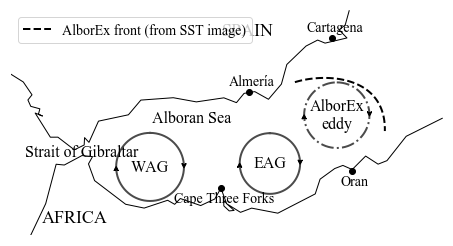

In [43]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
m.plot(0, 0)
add_places(m, labelDic, alpha=0)
m.drawcoastlines()
# decorate_map(m, coordinates, dlon, dlat)

myarrowdict = dict(arrowstyle="fancy", fc="k")
WAG.add_to_map(m=m, arrowprops=myarrowdict, lw=2., color='k', alpha=0.7)
EAG.add_to_map(m=m, arrowprops=myarrowdict, lw=2., color='k', alpha=0.7)
AlborexEddy.add_to_map(m=m, arrowprops=myarrowdict, lw=2., 
                       color='k', alpha=0.7, linestyle='-.')

# add_fronts(m)
m.plot(f.lon, f.lat, "k--", linewidth=2, latlon=True, label="AlborEx front (from SST image)")
plt.legend(fontsize=14)

f1 = plt.gca()
f1.axes.get_xaxis().set_ticks([])
f1.axes.get_yaxis().set_ticks([])
plt.savefig(os.path.join(alborexpaths.figdir, "alborex4leaflet"), transparent=True, dpi=500,
            bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

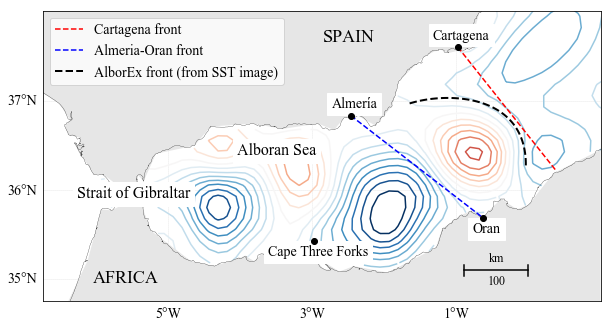

In [50]:
figname = 'front_schema01'
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.ax = ax

add_places(m, labelDic)
decorate_map(m, coordinates, dlon, dlat)

add_fronts(m)
altimetry.plot_sla(m)

plt.savefig(os.path.join(alborexpaths.figdir, figname), dpi=300, bbox_inches='tight', transparent=False,
             edgecolor='white', pad_inches=0)
plt.show()
plt.close()